We start by doing preproccesing!

This works for both the the large csv and the smaller one.

In [84]:
import re
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import *
from nltk.tokenize import word_tokenize

porter_stemmer = SnowballStemmer("english")
nltk.download('punkt')

df = pd.read_csv('Data/bigdata/big.csv')

def stem_sentence(sentence):
    # Tokenize the sentence
    token_words = word_tokenize(sentence)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in token_words if word.lower() not in stop_words]
    
    # Stem each word
    stemmed_sentence = [porter_stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words into a sentence
    return " ".join(stemmed_sentence)

if type(df['content']) == str:
    df['content'] = df['content'].apply(stem_sentence)
else:
    print("womp")
if type(df['title']) == str:
    df['title'] = df['title'].apply(stem_sentence)
else:
    print("womp")

df['content'].replace(regex={'\n{2,}': "" }, inplace=True)
df['content'].replace(regex={'\t{2,}': "" }, inplace=True)
df['content'].replace(regex={'\r{2,}': "" }, inplace=True)
print("whitespace is gone")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
print("lowercase")
df['content'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)
print("URLS gone")
df['content'].replace(regex={'[a-z]+@[a-z]+.[a-z]+': '<EMAIL>'}, inplace=True)
print("EMAILS GONE")
df['content'].replace(regex={'([0-9]{2})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{4})|([0-9]{4})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{2})': '<DATE>'}, inplace=True)
print("DATE GONE")
df['content'].replace(regex={'[0-9]+': '<NUM>'}, inplace=True)
print("NUM GONE")
#Now we do the same for title
df['title'].replace(regex={'\n{2,}': "" }, inplace=True)
df['title'].replace(regex={'\t{2,}': "" }, inplace=True)
df['title'].replace(regex={'\r{2,}': "" }, inplace=True)
print("whitespace is gone")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
print("title")
df['title'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)
print("URLS gone")
df['title'].replace(regex={'[a-z]+@[a-z]+.[a-z]+': '<EMAIL>'}, inplace=True)
print("EMAILS GONE")
df['title'].replace(regex={'([0-9]{2})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{4})|([0-9]{4})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{2})': '<DATE>'}, inplace=True)
print("DATE GONE")
df['title'].replace(regex={'[0-9]+': '<NUM>'}, inplace=True)
print("NUM GONE")
df.to_csv('Data/otherdata/SOMETHING.csv', index=True)
print("DONE")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/bigdata/big.csv')


womp
womp


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['content'].replace(regex={'\n{2,}': "" }, inplace=True)


whitespace is gone


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


lowercase


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['content'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)


URLS gone
EMAILS GONE
DATE GONE
NUM GONE


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].replace(regex={'\n{2,}': "" }, inplace=True)


whitespace is gone


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


title


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2120715670.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)


URLS gone
EMAILS GONE
DATE GONE
NUM GONE
DONE


We also quickly want to group the labels of the dataset, so that there are only 2 labels one for realnews and one for fakenews.

In [85]:

import pandas as pd

# Load data from CSV file with specified data types
df = pd.read_csv('Data/otherdata/SOMETHING.csv')

# Define a function to map types to categories
def map_type(Thetype):
    if Thetype in ['fake', 'bias', 'hate', 'conspiracy', 'junksci', 'satire', 'state']:
        return 'fake'
    elif Thetype in ['reliable', 'political', 'clickbait']:
        return 'real'
    else:
        return None

df['type'] = df['type'].apply(map_type)

something = df.drop(df[df['type'].isnull()].index)
LastSomething = something.drop(something[something['content'].isnull()].index)

LastSomething.to_csv('Data/otherdata/BIGCLEANED.csv', index=False)

C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2291116950.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/otherdata/SOMETHING.csv')


Now that we have a preproccesed dataset we can now start building our base model.

In [86]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/BIGCLEANED.csv')

def count_words(text):
    words = text.split()
    return len(words)

X = df['content'].apply(count_words)
Y = df["type"].dropna()  

X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

basemodel = LogisticRegression()

# Train the model on the training data
basemodel.fit(X_train.values.reshape(-1, 1), y_train)


dump(basemodel, 'basemodel.joblib')

['basemodel.joblib']

We want to add meta-data to the model, so we will be traning a new model with the title meta-data, the resoning is shown in the report.

But to do this we also need to remove all the articles with missing title values.

In [87]:

import pandas as pd

# Load data from CSV file with specified data types
df = pd.read_csv('Data/otherdata/SOMETHING.csv')

# Define a function to map types to categories
def map_type(Thetype):
    if Thetype in ['fake', 'bias', 'hate', 'conspiracy', 'junksci', 'satire', 'state']:
        return 'fake'
    elif Thetype in ['reliable', 'political', 'clickbait']:
        return 'real'
    else:
        return None

df['type'] = df['type'].apply(map_type)

something = df.drop(df[df['type'].isnull()].index)
LastSomething = something.drop(something[something['content'].isnull()].index)
LastLastSomething = LastSomething.drop(LastSomething[LastSomething['title'].isnull()].index) 
LastLastSomething.to_csv('Data/otherdata/Trainedwithtittle.csv', index=False)


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\1585817518.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/otherdata/SOMETHING.csv')


In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/Trainedwithtittle.csv')

def count_words(text):
    words = text.split()
    return len(words)


X =  df['title'].apply(count_words) + df['content'].apply(count_words)
Y = df["type"].dropna()  

X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )
basemodel = LogisticRegression()

# Train the model on the training data
basemodel.fit(X_train.values.reshape(-1, 1), y_train)


dump(basemodel, 'basemodelwithtitle.joblib')


['basemodelwithtitle.joblib']

Now that we have trained that we will also look at the results.

Firstly we look at the results of the simple model without meta-data.

In [89]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
from sklearn.metrics import accuracy_score
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score
import re

def count_words(text):
    words = text.split()
    return len(words)

df = pd.read_csv('Data/otherdata/BIGCLEANED.csv')
X = df["content"].dropna().apply(count_words)
y = df["type"].dropna()

# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodel.joblib')
loaded_model.fit(X_train.values.reshape(-1, 1), y_train)
# Make predictions using the loaded model
predictions = loaded_model.predict(X_test2.values.reshape(-1, 1))

print("BASE MODEL WITHOUT TITLE")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)





BASE MODEL WITHOUT TITLE
Accuracy (F1score)0.0
Accuracy (Not f1score)0.5452821125494205


c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        fake       0.00      0.00      0.00     36919
        real       0.55      1.00      0.71     44272

    accuracy                           0.55     81191
   macro avg       0.27      0.50      0.35     81191
weighted avg       0.30      0.55      0.38     81191



c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now we look at the simple model using meta-data.

In [90]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
from sklearn.metrics import accuracy_score
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score
import re

def count_words(text):
    words = text.split()
    return len(words)

df = pd.read_csv('Data/otherdata/Trainedwithtittle.csv')
X = df["content"].apply(count_words) + df["title"].apply(count_words)
y = df["type"].dropna()  

# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodelwithtitle.joblib')
loaded_model.fit(X_train.values.reshape(-1, 1), y_train)
# Make predictions using the loaded model
predictions = loaded_model.predict(X_test2.values.reshape(-1, 1))

print("BASE MODEL WITH TITLE")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)




BASE MODEL WITH TITLE
Accuracy (F1score)0.0
Accuracy (Not f1score)0.5483039770959108


c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        fake       0.00      0.00      0.00     36287
        real       0.55      1.00      0.71     44048

    accuracy                           0.55     80335
   macro avg       0.27      0.50      0.35     80335
weighted avg       0.30      0.55      0.39     80335



c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now we will try add data we scapred from BBC and see how this updates the model.

First we want to clean the BBC dataset.

In [91]:
import re
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

porter_stemmer = SnowballStemmer("english")
nltk.download('punkt')

df = pd.read_csv('Data/otherdata/BBC.csv')

def stem_sentence(sentence):
    # Tokenize the sentence
    token_words = word_tokenize(sentence)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in token_words if word.lower() not in stop_words]
    
    # Stem each word
    stemmed_sentence = [porter_stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words into a sentence
    return " ".join(stemmed_sentence)


df['text'].replace(regex={'\n{2,}': "" }, inplace=True)
df['text'].replace(regex={'\t{2,}': "" }, inplace=True)
df['text'].replace(regex={'\r{2,}': "" }, inplace=True)
print("whitespace is gone")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
print("lowercase")
df['text'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)
print("URLS gone")
df['text'].replace(regex={'[a-z]+@[a-z]+.[a-z]+': '<EMAIL>'}, inplace=True)
print("EMAILS GONE")
df['text'].replace(regex={'([0-9]{2})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{4})|([0-9]{4})[/]?[-]?([0-9]{2})[/]?[-]?([0-9]{2})': '<DATE>'}, inplace=True)
print("DATE GONE")
df['text'].replace(regex={'[0-9]+': '<NUM>'}, inplace=True)
print("NUM GONE")
df.to_csv('Data/otherdata/CleanBBC.csv', index=True)
print("DONE")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2011202007.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].replace(regex={'\n{2,}': "" }, inplace=True)


whitespace is gone


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2011202007.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


lowercase
URLS gone


C:\Users\vince\AppData\Local\Temp\ipykernel_5208\2011202007.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].replace(regex={'https://[.a-zA-Z0-9/-]+|www[.a-zA-Z0-9/-]+|http://[.a-zA-Z0-9/-]+': '<URL>'}, inplace=True)


EMAILS GONE
DATE GONE
NUM GONE
DONE


First we have to combine the BBC data with out dataset with title. There after we want to clean the data!

In [92]:
import re
import pandas as pd

df = pd.read_csv('Data/otherdata/Trainedwithtittle.csv')
gf = pd.read_csv('Data/otherdata/CleanBBC.csv')

gf = gf.rename(columns={'text': 'Content', 'headline': 'title'})
gf['type'] = 'real'

selected_columns = gf[['Content', 'title', 'type']]

combined_df = pd.concat([df, selected_columns], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('Data/otherdata/Combined.csv', index=False)

Now we want to preprocess the data!

In [93]:
import pandas as pd

# Load data from CSV file with specified data types
df = pd.read_csv('Data/otherdata/Combined.csv')

# Define a function to map types to categories
def map_type(Thetype):
    if Thetype in ['fake', 'bias', 'hate', 'conspiracy', 'junksci', 'satire', 'state']:
        return 'fake'
    elif Thetype in ['reliable', 'political']:
        return 'real'
    elif Thetype in ['real']:
        return 'real'
    else:
        return None

df['type'] = df['type'].apply(map_type)

something = df.drop(df[df['type'].isnull()].index)
LastSomething = something.drop(something[something['content'].isnull()].index)
LastLastSomething = LastSomething.drop(LastSomething[LastSomething['title'].isnull()].index) #Use when traning with tittle! 
LastSomething.to_csv('Data/otherdata/CleanedCombined.csv', index=False)

C:\Users\vince\AppData\Local\Temp\ipykernel_5208\3113449099.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/otherdata/Combined.csv')


Now we can train the model!

In [94]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/CleanedCombined.csv')

def count_words(text):
    words = text.split()
    return len(words)


X = df['content'].apply(count_words) + df['title'].apply(count_words)
Y = df["type"] 

print(len(X))
print(len(Y))
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )
basemodel = LogisticRegression()

# Train the model on the training data
basemodel.fit(X_train.values.reshape(-1, 1), y_train)

dump(basemodel, 'basemodelBBC.joblib')


803345
803345


['basemodelBBC.joblib']

Now we can test the results of the simple model with title meta-data and BBC news.

In [121]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
import re
from sklearn.metrics import *
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score

def count_words(text):
    words = text.split()
    return len(words)

df = pd.read_csv('Data/otherdata/CleanedCombined.csv')
X = df['content'].apply(count_words) + df['title'].apply(count_words)
y = df["type"]

# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodelBBC.joblib')

loaded_model.fit(X_train.values.reshape(-1, 1), y_train)

predictions = loaded_model.predict(X_test2.values.reshape(-1, 1))


print("BASE MODEL with BBC and TITLE")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)



BASE MODEL with BBC and TITLE
Accuracy (F1score)0.0
Accuracy (Not f1score)0.5483039770959108


c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        fake       0.00      0.00      0.00     36287
        real       0.55      1.00      0.71     44048

    accuracy                           0.55     80335
   macro avg       0.27      0.50      0.35     80335
weighted avg       0.30      0.55      0.39     80335



c:\Users\vince\anaconda3\envs\First\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now we will try the new simple model that uses diffrent data.

In [114]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/BIGCLEANED.csv')

X = df['content']
Y = df["type"]  

X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

basemodel = LogisticRegression()
big_difference_tokens = []
file_path = 'Data/otherdata/big_difference_tokens.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read each line from the file
    for line in file:
        # Append the line to the list, removing leading/trailing whitespace if needed
        big_difference_tokens.append(line.strip())


vectorizer = CountVectorizer(vocabulary=big_difference_tokens, max_features=50)

basemodel.fit(vectorizer.fit_transform(X_train), y_train)

dump(basemodel, 'basemodelnew.joblib')
dump(vectorizer, 'basemodelvec.joblib')

['basemodelvec.joblib']

Now lets see the preformance of the simple model using the new data.

In [115]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
import re
from sklearn.metrics import *
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score


df = pd.read_csv('Data/otherdata/BIGCLEANED.csv')
X = df['content']
y = df["type"].dropna()

# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodelnew.joblib')

vectorizer = load('basemodelvec.joblib')

predictions = loaded_model.predict(vectorizer.transform(X_test2))

print("BASE MODEL with NEW DATA")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)



BASE MODEL with NEW DATA
Accuracy (F1score)0.713505128383228
Accuracy (Not f1score)0.6951878902834058
              precision    recall  f1-score   support

        fake       0.62      0.83      0.71     36919
        real       0.81      0.58      0.67     44272

    accuracy                           0.70     81191
   macro avg       0.72      0.71      0.69     81191
weighted avg       0.72      0.70      0.69     81191



Simple model with title using New data

In [116]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/Trainedwithtittle.csv')

X = df['content'] + df['title']
Y = df["type"].dropna()  

X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

basemodel = LogisticRegression()
big_difference_tokens = []
file_path = 'Data/otherdata/big_difference_tokens.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read each line from the file
    for line in file:
        # Append the line to the list, removing leading/trailing whitespace if needed
        big_difference_tokens.append(line.strip())


vectorizer = CountVectorizer(vocabulary=big_difference_tokens, max_features=50)

basemodel.fit(vectorizer.fit_transform(X_train), y_train)
dump(basemodel, 'basemodelwithtitlenew.joblib')
dump(vectorizer, 'basemodelwithtitlVec.joblib')

['basemodelwithtitlVec.joblib']

Now test the simple model with new data and title 

In [117]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
import re
from sklearn.metrics import *
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/Trainedwithtittle.csv')
X = df['content'].dropna() + df['title'].dropna()
Y = df["type"].dropna()


# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodelwithtitlenew.joblib')

vectorizer = load('basemodelwithtitlVec.joblib')

predictions = loaded_model.predict(vectorizer.transform(X_test2))

print("BASE MODEL NEW DATA with title")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)



BASE MODEL NEW DATA with title
Accuracy (F1score)0.7083323444953367
Accuracy (Not f1score)0.6940312441650588
              precision    recall  f1-score   support

        fake       0.62      0.82      0.71     36287
        real       0.80      0.59      0.68     44048

    accuracy                           0.69     80335
   macro avg       0.71      0.71      0.69     80335
weighted avg       0.72      0.69      0.69     80335



Now we will train the simple model with new data title and bbs

In [119]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/CleanedCombined.csv')

X = df['content'] + df['title']
Y = df["type"].dropna()  

X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)


X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

basemodel = LogisticRegression()
big_difference_tokens = []
file_path = 'Data/otherdata/big_difference_tokens.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read each line from the file
    for line in file:
        # Append the line to the list, removing leading/trailing whitespace if needed
        big_difference_tokens.append(line.strip())

vectorizer = CountVectorizer(vocabulary=big_difference_tokens, max_features=50)

basemodel.fit(vectorizer.fit_transform(X_train), y_train)
dump(basemodel, 'basemodelBBCnew.joblib')
dump(vectorizer, 'basemodelBBCVec.joblib')

KeyboardInterrupt: 

Lets look at the results of the simple model with BBC News new data and title.

In [118]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import load, dump
import re
from sklearn.metrics import *
import pandas as pd
import collections, numpy
from sklearn.metrics import f1_score

df = pd.read_csv('Data/otherdata/CleanedCombined.csv')
X = df['content'] + df['title']
Y = df["type"].dropna()


# Split the data into one training set and one combined test set
X_train, X_combined_test, y_train, y_combined_test = train_test_split(X, Y, test_size=0.2, random_state=32)

# Split the combined test set into two separate test sets
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_combined_test, y_combined_test, test_size=0.5, random_state=32 )

loaded_model = load('basemodelBBCnew.joblib')
vectorizer = load('basemodelBBCVec.joblib')

predictions = loaded_model.predict(vectorizer.transform(X_test2))

print("BASE MODEL NEW DATA with title and BBC data")
# Print the predictions
f1score = f1_score(y_test2, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(y_test2, predictions)
print(clas)



ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

Now we will test the simple models performance on the LIAR DATASET. Firstly we have to clean the dataset.

In [104]:
import pandas as pd

df = pd.read_csv('Data/liardata/train.tsv', header=None, delimiter='\t')

# Define a function to map types to categories
def map_type(Thetype):
    if str(Thetype) in ['false', 'pants-fire', 'barely-true']:
        return 'fake'
    if str(Thetype) in ['mostly-true', 'true']:
        return 'real'
    else:
        return None  # Return None for types that don't match the conditions

df[1] = df[1].apply(map_type)

newting = df.drop(df[df[1].isnull()].index)

# Save the modified DataFrame to a new TSV file
newting.to_csv('Data/liardata/FinalTest.tsv', sep='\t', index=False, header=False)


Now we can test simple model on the liar dataset:

Accuracy (F1score)0.0
Accuracy (Not f1score)0.4476987447698745


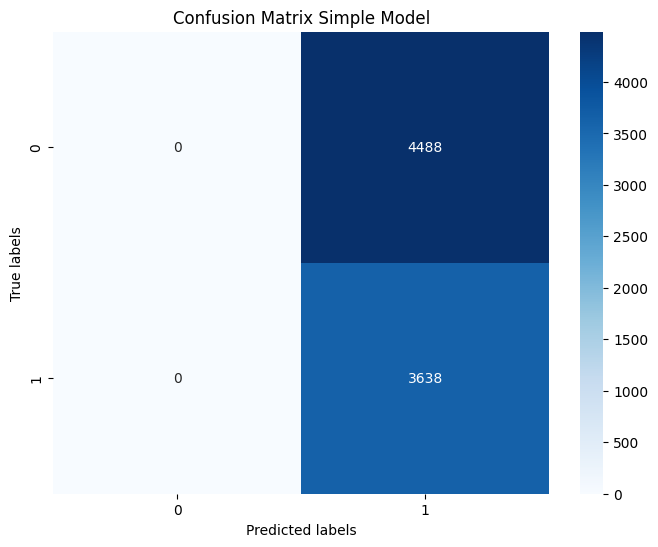

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import load, dump
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import collections, numpy
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv('Data/liardata/FinalTest.tsv', sep='\t' , header=None)

def count_words(text):
    words = text.split()
    return len(words)

#Load data from tsv test file
content = df.iloc[:, 2].apply(count_words)
Realawnser = df.iloc[:, 1]

loaded_model = load('basemodel.joblib')
#Transform content
predictions = loaded_model.predict(content.values.reshape(-1, 1))
# Print the predictions
f1score = f1_score(Realawnser, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(Realawnser, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')

cm = confusion_matrix(Realawnser,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Simple Model')
plt.show()





Now we can test the simple model with the 50 words.

BASE MODEL NEW DATA with title and BBC data
Accuracy (F1score)0.6971663244353182
Accuracy (Not f1score)0.5462712281565346
              precision    recall  f1-score   support

        fake       0.55      0.95      0.70      4488
        real       0.44      0.05      0.10      3638

    accuracy                           0.55      8126
   macro avg       0.50      0.50      0.40      8126
weighted avg       0.50      0.55      0.43      8126



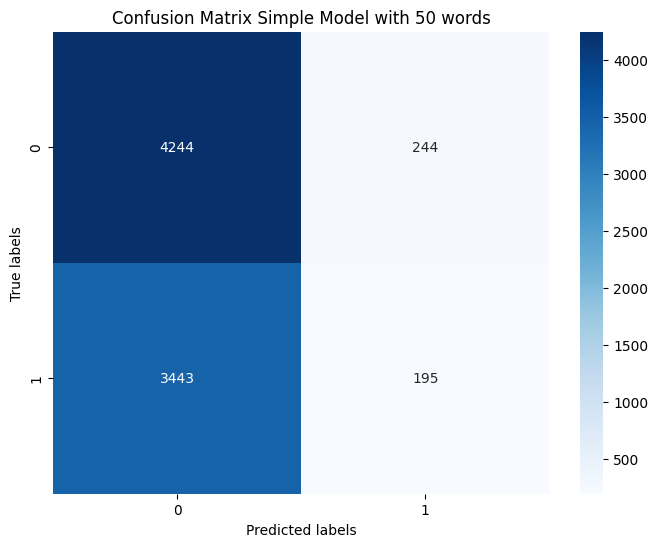

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import load, dump
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import collections, numpy
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv('Data/liardata/FinalTest.tsv', sep='\t' , header=None)


#Load data from tsv test file
content = df.iloc[:, 2]
Realawnser = df.iloc[:, 1]

loaded_model = load('basemodelBBCnew.joblib')

big_difference_tokens = []

file_path = 'Data/otherdata/big_difference_tokens.txt'
# Open the file in read mode
with open(file_path, 'r') as file:
    # Read each line from the file
    for line in file:
        # Append the line to the list, removing leading/trailing whitespace if needed
        big_difference_tokens.append(line.strip())

predictions = loaded_model.predict(vectorizer.fit_transform(content))
print("BASE MODEL NEW DATA with title and BBC data")
# Print the predictions
f1score = f1_score(Realawnser, predictions, pos_label="fake", average='binary')
test_accuracy = accuracy_score(Realawnser, predictions)
print(f'Accuracy (F1score){f1score}')
print(f'Accuracy (Not f1score){test_accuracy}')
clas = classification_report(Realawnser, predictions)
print(clas)


cm = confusion_matrix(Realawnser,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Simple Model with 50 words')
plt.show()





To replicate advanced model performance, we will start with doing another preprocessing process.

Because of the size of data, we chop our preprocessing up in modular pieces, so it is easier to work with.
We load the unprocessed data file, and get a new csv file, with cleaned data. This means, lowercasing, tagging of URL's, E-mails, dates, numbers, and extra white space.

In [ ]:
import re
import pandas as pd 

def remove_whitespace(text):
    text = re.sub(r"\n{2,}", "\n", text)
    text = re.sub(r"\t{2,}", "\t", text)
    text = re.sub(r"\r{2,}", "\r", text)
    text = re.sub(r"\f{2,}", "\f", text)
    text = re.sub(r"\v{2,}", "\v", text)
    text = re.sub(r" {2,}" , " ", text)
    return text

def clean_text(filename, mode):
    df = pd.read_csv(filename)
    valid_only = df["content"].dropna()
    print("DROPPING NONE DONE YAY")
    valid_only = valid_only.apply( lambda x : x.lower() )

    print("LOWERCASING DONE YAY")

    urlpattern = r"\b(https?://[\w\.\-]*\w+|www\d*)\.\w+[/\w\-\.\?=%#]+"
    valid_only.replace(regex={urlpattern: "<URL>"}, inplace = True)
    print("REPLACING URLs DONE YAY")
    emailpattern = r"\b[\w\-\.]+@[\w\-\.]+"
    valid_only.replace(regex={emailpattern: "<EMAIL>"}, inplace = True)
    print("REPLACING EMAILS DONE YAY")

    datepattern = r"\b(\d{4})-?(0[1-9]|1[0-2])-?(0[1-9]|[12][0-9]|3[01])\b"
    valid_only.replace(regex={datepattern: "<DATE>"}, inplace = True)
    print("REPLACING DATEs DONE YAY")

    numpattern = r"\$?\+?\d+(st?|nd?|rd?|th?)?"
    valid_only.replace(regex={numpattern: "<NUM>"}, inplace = True)
    print("REPLACING NUMs DONE YAY")

    valid_only = valid_only.apply(remove_whitespace)
    print("REMOVING WHITESPACE DONE YAY")
    
    
    if mode == "return_content_only":
        return valid_only
    elif mode == "to_csv_content_only":
        valid_only.to_csv('../data/HALLAEOW.csv', index=False)  
    elif mode == "return_all_rows":
        df["content"] = valid_only
        return df
    elif mode == "to_csv_all_rows":
        df["content"] = valid_only
        df.to_csv('Data/for_advanced_model/CLEANED.csv', index=False)  

filename = "Data/bigdata/big.csv"
clean_text(filename, mode="to_csv_all_rows")

Now we have generated a new csv file with cleaned content. We can now load this new csv, to make a new csv file with binary classification.
We refer to later explanation of the categorization.

In [ ]:

def make_binary(filename):
    df = pd.read_csv(filename)
    
    fake_types = ["fake", "bias", "conspiracy", "junksci", "hate", "satire"]
    real_types = ["reliable", "clickbait", "political"]
    
    df_filtered = df[df["type"].isin(fake_types + real_types)]
    print("FILTERING DONE")
    df_filtered.loc[df_filtered["type"].isin(fake_types), "type"] = "fake"
    print("FAKE")
    df_filtered.loc[df_filtered["type"].isin(real_types), "type"] = "real"
    print("REAL")

    df_filtered.to_csv('Data/for_advanced_model/CLEANED_BINARY.csv', index=False)
    
    print(len(df_filtered))
    
make_binary("Data/for_advanced_model/CLEANED.csv")



We now have a new csv file, where our data is cleaned and with only 2 types.

Because we test on data with both with and without stemming and removal of stopwords, we need to make a new csv file, where the content is stemmed and stop words removed. We make use of some helper functions, so let us list them first!


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def stem_and_stop_words(match):
    word = match.group(0)
    if word.lower() in stop_words:
        return ""  # Return empty string for stop words
    else:
        return stemmer.stem(word)  # Stem non-stopwords

# Example usage:
def justapplyonseries(text):
    text = re.sub(r'\b\w+\b', stem_and_stop_words, text)
    text = re.sub(r'\s+', " ", text)  # Replace consecutive spaces with a single space
    return text


Now, we can run our script!

In [ ]:
# filename = "../data/all_rows_sample_250_news.csv"
filename = "Data/for_advanced_model/CLEANED_BINARY.csv"

df = pd.read_csv(filename)

df.dropna(subset=['content'], inplace=True)

df.dropna(subset=['type'], inplace=True)

df["content"] = df["content"].apply(lambda x: justapplyonseries(x))

df.to_csv('Data/for_advanced_model/CLEANED_BINARY_STEM_AND_STOPWORDS.csv', index=False)  


Now that we have a preproccesed dataset we can now start building our advanced model.

We load the csv file, drop bad values, and load them into variables X and Y

In [ ]:

filename = 'Data/for_advanced_model/CLEANED_BINARY.csv'
df = pd.read_csv(filename)
print("halla")

df.dropna(subset=['content'], inplace=True)
print("abow")

df.dropna(subset=['type'], inplace=True)
print("wiii")

X = df["content"]
print("X")
Y = df["type"]
print("Y")



We split the data into training and data. 

In [ ]:
from sklearn.model_selection import train_test_split

seed = 39 # for reproducability                                       

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=seed)
print("TRAINING SPLIT DONE")


X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)
print("TEST AND VALIDATION SPLIT DONE")


We make TF-IDF row with X_train and transform X_validation and X_test.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train = vectorizer.fit_transform(X_train)
print("TFIDF ROW LEARNED MADE")

X_validation = vectorizer.transform(X_validation)
print("TFIDF DONE FOR X_VALIDATION")

X_test = vectorizer.transform(X_test)
print("TFIDF DONE FOR X_TEST")


we instantiate model, and fit X_train on Y_train

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver="saga", multi_class="ovr", C=100, n_jobs=-1, penalty="l2", class_weight="balanced", max_iter=10000)


model.fit(X_train, Y_train)
print("MODEL TRAINED")


we make predictions, and get a report of metrics.

In [ ]:
from sklearn.metrics import *
Y_train_pred = model.predict(X_train)

print(f'Training accuracy: {accuracy_score(Y_train, Y_train_pred)}')

print("FOR TEST\n\n")
Y_test_pred = model.predict(X_test)
report_test = classification_report(Y_test, Y_test_pred)
print(report_test)

hyperparameters = model.get_params()
print(hyperparameters)

We dump model to store them

In [ ]:
import joblib
joblib.dump(model, f'Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}MODEL.joblib')
joblib.dump(X_train, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}x_train.joblib")
joblib.dump(X_validation, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}x_validation.joblib")
joblib.dump(Y_train, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}y_train.joblib")
joblib.dump(Y_validation, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}y_validation.joblib")
joblib.dump(X_test, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}x_test.joblib")
joblib.dump(Y_test, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}y_test.joblib")
joblib.dump(vectorizer, f"Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/{seed}vectorizer.joblib")

We want to add meta-data to the model, so we will be traning a new model with the title meta-data, the resoning is shown in the report.

We do exactly the same with stemmed and removal of stop words. 

In [ ]:

filename = 'Data/for_advanced_model/CLEANED_BINARY_STEM_AND_STOPWORDS.csv'
df = pd.read_csv(filename)
print("halla")

df.dropna(subset=['content'], inplace=True)
print("abow")

df.dropna(subset=['type'], inplace=True)
print("wiii")

X = df["content"]
print("X")
Y = df["type"]
print("Y")


from sklearn.model_selection import train_test_split

seed = 39 # for reproducability                                       

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=seed)
print("TRAINING SPLIT DONE")


X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)
print("TEST AND VALIDATION SPLIT DONE")

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train = vectorizer.fit_transform(X_train)
print("TFIDF ROW LEARNED MADE")

X_validation = vectorizer.transform(X_validation)
print("TFIDF DONE FOR X_VALIDATION")

X_test = vectorizer.transform(X_test)
print("TFIDF DONE FOR X_TEST")

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver="saga", multi_class="ovr", C=100, n_jobs=-1, penalty="l2", class_weight="balanced", max_iter=10000)


model.fit(X_train, Y_train)
print("MODEL TRAINED")

Y_train_pred = model.predict(X_train)

print(f'Training accuracy: {accuracy_score(Y_train, Y_train_pred)}')

print("FOR TEST\n\n")
Y_test_pred = model.predict(X_test)
report_test = classification_report(Y_test, Y_test_pred)
print(report_test)

hyperparameters = model.get_params()
print(hyperparameters)

import joblib
joblib.dump(model, f'Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}MODEL.joblib')
joblib.dump(X_train, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}x_train.joblib")
joblib.dump(X_validation, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}x_validation.joblib")
joblib.dump(Y_train, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}y_train.joblib")
joblib.dump(Y_validation, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}y_validation.joblib")
joblib.dump(X_test, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}x_test.joblib")
joblib.dump(Y_test, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}y_test.joblib")
joblib.dump(vectorizer, f"Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/{seed}vectorizer.joblib")


We also want to quickly see performance with title included. For this, we clean title in CLEANED_BINARY first. We make a little modification to the preprocessing function, like this:

In [ ]:
def clean_text_title(filename, mode):
    df = pd.read_csv(filename)
    valid_only = df["title"].dropna()
    print("DROPPING NONE DONE YAY")
    valid_only = valid_only.apply( lambda x : x.lower() )

    print(valid_only[0])
    print("LOWERCASING DONE YAY")

    urlpattern = r"\b(https?://[\w\.\-]*\w+|www\d*)\.\w+[/\w\-\.\?=%#]+"
    valid_only.replace(regex={urlpattern: "<URL>"}, inplace = True)
    print("REPLACING URLs DONE YAY")
    emailpattern = r"\b[\w\-\.]+@[\w\-\.]+"
    valid_only.replace(regex={emailpattern: "<EMAIL>"}, inplace = True)
    print("REPLACING EMAILS DONE YAY")

    datepattern = r"\b(\d{4})-?(0[1-9]|1[0-2])-?(0[1-9]|[12][0-9]|3[01])\b"
    valid_only.replace(regex={datepattern: "<DATE>"}, inplace = True)
    print("REPLACING DATEs DONE YAY")

    numpattern = r"\$?\+?\d+(st?|nd?|rd?|th?)?"
    valid_only.replace(regex={numpattern: "<NUM>"}, inplace = True)
    print("REPLACING NUMs DONE YAY")

    valid_only = valid_only.apply(remove_whitespace)
    print("REMOVING WHITESPACE DONE YAY")
    
    
    if mode == "return":
        return valid_only
    elif mode == "to_csv":
        valid_only.to_csv('../data/HALLAEOW.csv', index=False)  
    elif mode == "return_all_rows":
        df["content"] = valid_only
        return df
    elif mode == "all_rows_to_csv":
        df["title"] = valid_only
        df.to_csv('Data/for_advanced_model/CLEANED_BINARY_TITLE.csv', index=False)  

We call this function to make a new csv file with title cleaned also.

In [ ]:
filename = "Data/for_advanced_model/CLEANED_BINARY.csv"
clean_text_title(filename, mode="all_rows_to_csv")

we now train a model and get performance as well as dumping it for now with title without stemming and stop word removal.

In [ ]:

filename = 'Data/for_advanced_model/CLEANED_BINARY_TITLE.csv'
df = pd.read_csv(filename)
print("halla")

df.dropna(subset=['content'], inplace=True)
print("abow")

df.dropna(subset=['type'], inplace=True)
print("wiii")

df.dropna(subset=['title'], inplace=True)

X = df["content"] + df["title"]
print("X")
Y = df["type"]
print("Y")


from sklearn.model_selection import train_test_split

seed = 39 # for reproducability                                       

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=seed)
print("TRAINING SPLIT DONE")


X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)
print("TEST AND VALIDATION SPLIT DONE")

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train = vectorizer.fit_transform(X_train)
print("TFIDF ROW LEARNED MADE")

X_validation = vectorizer.transform(X_validation)
print("TFIDF DONE FOR X_VALIDATION")

X_test = vectorizer.transform(X_test)
print("TFIDF DONE FOR X_TEST")

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver="saga", multi_class="ovr", C=100, n_jobs=-1, penalty="l2", class_weight="balanced", max_iter=10000)


model.fit(X_train, Y_train)
print("MODEL TRAINED")

from sklearn.metrics import *
Y_train_pred = model.predict(X_train)

print(f'Training accuracy: {accuracy_score(Y_train, Y_train_pred)}')

print("FOR TEST\n\n")
Y_test_pred = model.predict(X_test)
report_test = classification_report(Y_test, Y_test_pred)
print(report_test)

hyperparameters = model.get_params()
print(hyperparameters)

import joblib
joblib.dump(model, f'Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}MODEL.joblib')
joblib.dump(X_train, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}x_train.joblib")
joblib.dump(X_validation, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}x_validation.joblib")
joblib.dump(Y_train, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}y_train.joblib")
joblib.dump(Y_validation, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}y_validation.joblib")
joblib.dump(X_test, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}x_test.joblib")
joblib.dump(Y_test, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}y_test.joblib")
joblib.dump(vectorizer, f"Data/for_advanced_model/dumps/plus_title_without_stem_and_stop_word_removal/{seed}vectorizer.joblib")


we have now dumped all models. Let us evaluate them on LIAR. we preprocess LIAR. We alter preprocess function abit again

In [ ]:
def clean_liar(filename, mode):
    df = pd.read_csv(filename, header=None, delimiter='\t')
    valid_only = df.iloc[:, 2].dropna()
    print("DROPPING NONE DONE YAY")
    valid_only = valid_only.apply( lambda x : x.lower() )

    print(valid_only[0])
    print("LOWERCASING DONE YAY")

    urlpattern = r"\b(https?://[\w\.\-]*\w+|www\d*)\.\w+[/\w\-\.\?=%#]+"
    valid_only.replace(regex={urlpattern: "<URL>"}, inplace = True)
    print("REPLACING URLs DONE YAY")
    emailpattern = r"\b[\w\-\.]+@[\w\-\.]+"
    valid_only.replace(regex={emailpattern: "<EMAIL>"}, inplace = True)
    print("REPLACING EMAILS DONE YAY")

    datepattern = r"\b(\d{4})-?(0[1-9]|1[0-2])-?(0[1-9]|[12][0-9]|3[01])\b"
    valid_only.replace(regex={datepattern: "<DATE>"}, inplace = True)
    print("REPLACING DATEs DONE YAY")

    numpattern = r"\$?\+?\d+(st?|nd?|rd?|th?)?"
    valid_only.replace(regex={numpattern: "<NUM>"}, inplace = True)
    print("REPLACING NUMs DONE YAY")

    valid_only = valid_only.apply(remove_whitespace)
    print("REMOVING WHITESPACE DONE YAY")
    
    
    if mode == "return":
        return valid_only
    elif mode == "to_csv":
        valid_only.to_csv('../data/HALLAEOW.csv', index=False)  
    elif mode == "return_all_rows":
        df["content"] = valid_only
        return df
    elif mode == "all_rows_to_csv":
        df.iloc[:, 2] = valid_only
        df.to_csv('Data/for_advanced_model/LIAR_CLEANED.tsv', sep="\t", index=False, header=False)  

we clean

In [ ]:
filename = "Data/liardata/train.tsv"
clean_liar(filename, mode="all_rows_to_csv")

we make labels binary in fake and real

In [ ]:
import pandas as pd

df = pd.read_csv('Data/for_advanced_model/LIAR_CLEANED.tsv', header=None, delimiter='\t')

# Define a function to map types to categories
def map_type(Thetype):
    if str(Thetype) in ['false', 'pants-fire', 'barely-true']:
        return 'fake'
    if str(Thetype) in ['mostly-true', 'true']:
        return 'real'
    else:
        return None  # Return None for types that don't match the conditions

df[1] = df[1].apply(map_type)

newting = df.drop(df[df[1].isnull()].index)

# Save the modified DataFrame to a new TSV file
newting.to_csv('Data/for_advanced_model/LIAR_CLEANED_BINARY.tsv', sep='\t', index=False, header=False)

we can now assess performance on LIAR for all models.

In [ ]:
# We load all models and vectorizers
model_only_cleaned = joblib.load("Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/39MODEL.joblib")

vectorizer_only_cleaned = joblib.load("Data/for_advanced_model/dumps/without_stem_and_stop_word_removal/39vectorizer.joblib")

model_with_stem_and_stopword_removal = joblib.load("Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/39MODEL.joblib")
vectorizer_with_stem_and_stopword_removal = joblib.load("Data/for_advanced_model/dumps/with_stem_and_stop_word_removal/39vectorizer.joblib")

we now load LIAR DATA, vectorize them, predict on them and print metrics report.

In [ ]:
filename = 'Data/for_advanced_model/LIAR_CLEANED_BINARY.tsv' 
df = pd.read_csv(filename, header=None, delimiter='\t')

X_liar = df.iloc[:, 2].dropna()
Y_liar = df.iloc[:, 1].dropna()

X_liar_only_cleaned = vectorizer_only_cleaned.transform(X_liar)

Y_liar_only_cleaned_pred = model_only_cleaned.predict(X_liar_only_cleaned)


print("\n\nFOR LIAR on ONLY CLEANED\n")
report_LIAR_only_cleaned  = classification_report(Y_liar, Y_liar_only_cleaned_pred, digits=3)

print(report_LIAR_only_cleaned)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_true and Y_pred are your true labels and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(Y_liar, Y_liar_only_cleaned_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
filename = 'Data/for_advanced_model/LIAR_CLEANED.tsv' 
df = pd.read_csv(filename, header=None, delimiter='\t')


X_liar_stemmed_stop_words = vectorizer_with_stem_and_stopword_removal.transform(X_liar)

Y_liar_stemmed_stopwords_pred = model_with_stem_and_stopword_removal.predict(X_liar_stemmed_stop_words)


print("\n\nFOR LIAR on STEMMED AND STOP WORDS REMOVED\n")
report_LIAR_stemmed_stop_words  = classification_report(Y_liar, Y_liar_stemmed_stopwords_pred, digits=3)

print(report_LIAR_stemmed_stop_words)

# Assuming Y_true and Y_pred are your true labels and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(Y_liar, Y_liar_only_cleaned_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


we will also test on BBC news to validate, that model is better with longer articles. 
We will clean BBC articles. We make a new variant of clean text matching to bbc 

In [ ]:


def clean_bbc(filename, mode):
    df = pd.read_csv(filename)
    valid_only = df["text"].dropna()
    print("DROPPING NONE DONE YAY")
    valid_only = valid_only.apply( lambda x : x.lower() )

    print(valid_only[0])
    print("LOWERCASING DONE YAY")

    urlpattern = r"\b(https?://[\w\.\-]*\w+|www\d*)\.\w+[/\w\-\.\?=%#]+"
    valid_only.replace(regex={urlpattern: "<URL>"}, inplace = True)
    print("REPLACING URLs DONE YAY")
    emailpattern = r"\b[\w\-\.]+@[\w\-\.]+"
    valid_only.replace(regex={emailpattern: "<EMAIL>"}, inplace = True)
    print("REPLACING EMAILS DONE YAY")

    datepattern = r"\b(\d{4})-?(0[1-9]|1[0-2])-?(0[1-9]|[12][0-9]|3[01])\b"
    valid_only.replace(regex={datepattern: "<DATE>"}, inplace = True)
    print("REPLACING DATEs DONE YAY")

    numpattern = r"\$?\+?\d+(st?|nd?|rd?|th?)?"
    valid_only.replace(regex={numpattern: "<NUM>"}, inplace = True)
    print("REPLACING NUMs DONE YAY")

    valid_only = valid_only.apply(remove_whitespace)
    print("REMOVING WHITESPACE DONE YAY")
    
    
    if mode == "return":
        return valid_only
    elif mode == "to_csv":
        valid_only.to_csv('../data/HALLAEOW.csv', index=False)  
    elif mode == "return_all_rows":
        df["content"] = valid_only
        return df
    elif mode == "all_rows_to_csv":
        df["text"] = valid_only
        df.to_csv('Data/for_advanced_model/BBC_CLEANED.csv', index=False)  



In [ ]:
filename = "Data/otherdata/BBC.csv"
clean_bbc(filename, mode="all_rows_to_csv")

we have cleaned bbc articles now. Now we can see accuracy. We do the same as for LIAR.

In [ ]:
filename = 'Data/for_advanced_model/BBC_CLEANED.csv' 
df = pd.read_csv(filename)

print("halla")

df.dropna(subset=["text"], inplace=True)
print("abow")

X_bbc = df["text"]
print("X")
Y_bbc = pd.Series( ["real"] * len(X_bbc))

X_bbc_cleaned = vectorizer_only_cleaned.transform(X_bbc)

Y_pred = model_only_cleaned.predict(X_bbc_cleaned)


print("\n\nFOR LIAR on ONLY CLEANED\n")
report_bbc  = classification_report(Y_bbc, Y_pred, digits=3)

print(report_bbc)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_true and Y_pred are your true labels and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(Y_bbc, Y_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


we do the same for with stemming and removal of stop words 

In [ ]:
filename = 'Data/for_advanced_model/BBC_CLEANED.csv' 
df = pd.read_csv(filename)

print("halla")


X_bbc_stem_stopwords = vectorizer_only_cleaned.transform(X_bbc)

Y_pred = model_only_cleaned.predict(X_bbc_stem_stopwords)


print("\n\nFOR LIAR on STEMMED AND REMOVED STOP WORDS \n")
report_bbc  = classification_report(Y_bbc, Y_pred, digits=3)

print(report_bbc)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_true and Y_pred are your true labels and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(Y_bbc, Y_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
